## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [38]:
samples_tr = x_train.shape[0] + y_train.shape[0]
print("The no of training samples are:",samples_tr)

The no of training samples are: 120000


In [39]:
samples_te = x_test.shape[0] + y_test.shape[0]
print("The no of test samples are:",samples_te)

The no of test samples are: 20000


### Find dimensions of an image in the dataset

In [40]:
print("The dimensions of an image in the dataset is :" ,x_train[0].shape)

The dimensions of an image in the dataset is : (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import keras
y_train_enc = keras.utils.to_categorical(y_train)

In [0]:
y_test_enc = keras.utils.to_categorical(y_test)

### Import the necessary layers from keras to build the model

In [0]:
from keras.layers import Conv2D,BatchNormalization,MaxPool2D,Dense,Flatten

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_sc = x_train/255
x_test_sc = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
from keras.models import Sequential
model = Sequential()

In [0]:
model.add(keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

In [0]:
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics =['accuracy'])

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [50]:
call = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(x_train_sc,y_train_enc,epochs = 10,batch_size = 64,validation_data=(x_test_sc,y_test_enc),callbacks=[call])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.4224 - acc: 0.8488 - val_loss: 0.2982 - val_acc: 0.8922
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2660 - acc: 0.9024 - val_loss: 0.2457 - val_acc: 0.9088
Epoch 3/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2172 - acc: 0.9203 - val_loss: 0.2203 - val_acc: 0.9195
Epoch 4/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1782 - acc: 0.9338 - val_loss: 0.2253 - val_acc: 0.9201
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.1521 - acc: 0.9426 - val_loss: 0.2322 - val_acc: 0.9182
Epoch 6/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.1291 - acc: 0.9517 - val_loss: 0.2317 - val_acc: 0.9213
Epoch 7/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.1103 - acc: 0.9588 - val_loss: 0.2605 - 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                 width_shift_range=0.2,
                                                                 height_shift_range=0.2,
                                                                 horizontal_flip=True, 
                                                                 validation_split=0.2)



In [0]:
import numpy as np
x_train_sc_gen = np.expand_dims(x_train_sc,-1)

In [56]:
x_train_sc_gen.shape

(60000, 28, 28, 1)

In [0]:
datagen.fit(x_train_sc_gen)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

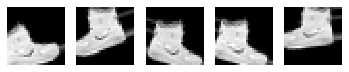

In [59]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_sc_gen[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [72]:
x_train_sc.shape

(60000, 28, 28)

In [73]:
gen=datagen.flow(np.expand_dims(x_train_sc,-1), y=y_train_enc)
gen

In [0]:
from keras.models import Sequential
model1 = Sequential()
model1.add(BatchNormalization(input_shape = (28,28,1)))
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.Dense(10, activation='softmax'))

In [74]:
model1.fit_generator(gen,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.8428 - acc: 0.6858
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6369 - acc: 0.7624
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5769 - acc: 0.7847
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5405 - acc: 0.7994
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5145 - acc: 0.8112
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4990 - acc: 0.8163
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4841 - acc: 0.8211
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4771 - acc: 0.8274
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4609 - acc: 0.8314
Epoch 10/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.4564 - acc: 0.8331


###  Report the final train and validation accuracy

In [83]:
print("The train loss of the model is {} &\n train accuracy is {}".format(model1.evaluate(gen)[0],model1.evaluate(gen)[1]))

1875/1875 [==============================] - 16s 8ms/step
The train loss of the model is 0.39048630523681643 &
 train accuracy is 0.8559833333333333


In [85]:
model1.evaluate(np.expand_dims(x_test_sc,-1),y_test_enc)

10000/10000 [==============================] - 1s 64us/step


[0.398004482960701, 0.859]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

### **Load CIFAR10 dataset**

In [97]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                 width_shift_range=0.2,
                                                                 height_shift_range=0.2,
                                                                 horizontal_flip=True,
                                                                 vertical_flip = True,
                                                                 validation_split=0.2)



### **Prepare/fit the generator.**

In [99]:
gene=datagen.random_transform(x_train[4])
gene

array([[[161, 177, 213],
        [163, 179, 215],
        [163, 179, 215],
        ...,
        [168, 181, 198],
        [168, 181, 198],
        [168, 181, 198]],

       [[159, 177, 213],
        [162, 179, 214],
        [163, 179, 214],
        ...,
        [153, 169, 185],
        [155, 171, 187],
        [156, 171, 187]],

       [[155, 175, 215],
        [158, 177, 214],
        [163, 179, 216],
        ...,
        [ 96, 114, 129],
        [ 99, 117, 132],
        [103, 121, 136]],

       ...,

       [[ 72,  82,  83],
        [ 75,  85,  86],
        [ 78,  87,  89],
        ...,
        [ 68,  76,  77],
        [ 69,  77,  77],
        [ 69,  77,  78]],

       [[ 72,  82,  83],
        [ 76,  85,  86],
        [ 79,  88,  89],
        ...,
        [ 67,  75,  78],
        [ 67,  75,  78],
        [ 67,  75,  78]],

       [[ 72,  82,  83],
        [ 76,  85,  86],
        [ 79,  88,  89],
        ...,
        [ 67,  75,  78],
        [ 67,  75,  78],
        [ 67,  75,  78]]

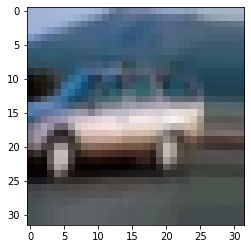

In [100]:
plt.imshow(gene)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

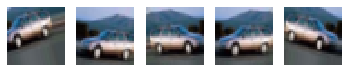

In [105]:
from matplotlib import pyplot as plt
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    gene=datagen.random_transform(x_train[4])
    plt.imshow(gene)
    plt.plot()
plt.show()